<a href="https://colab.research.google.com/github/imehsanullah/MLPEncoderDecoder/blob/main/MLPEncodeDecoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Library Usage for MLP Implementation

To implement MLP for this assignment we leveraged PyTorch library.

**Documentation** : https://pytorch.org/docs/stable/index.html

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

class EncoderDecoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        """
            Encoder-Decoder network that can handle different architectures
        Args:
            input_size: Number of input/output neurons
            hidden_size: Number of hidden neurons
        """
        super(EncoderDecoder, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        # layers
        self.encoder = nn.Linear(input_size, hidden_size)
        self.decoder = nn.Linear(hidden_size, input_size)

        self.hidden_activation = nn.Sigmoid()
        self.output_activation = nn.Sigmoid()

    def forward(self, x):
        hidden = self.hidden_activation(self.encoder(x))
        output = self.output_activation(self.decoder(hidden))
        return output, hidden

def generate_patterns(size):
    """Generate identity matrix patterns of specified size"""
    return torch.eye(size)


def train_network(model, patterns,
                                  max_epochs=50000,
                                  learning_rate=0.01,
                                  error_threshold=1e-6,
                                  patience=1000,
                                  min_improvement=1e-8):
    """
    Train network until desired result is achieved using early stopping

    Args:
        model: The neural network model
        patterns: Training patterns
        max_epochs: Maximum number of epochs to train
        learning_rate: Learning rate for optimizer
        error_threshold: Target error threshold for stopping
        patience: Number of epochs to wait for improvement
        min_improvement: Minimum improvement to be considered significant
    """
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    losses = []
    hidden_states = []
    best_loss = float('inf')
    epochs_without_improvement = 0

    print("Training until convergence...")

    for epoch in range(max_epochs):
        optimizer.zero_grad()
        outputs, hidden = model(patterns)
        loss = criterion(outputs, patterns)
        loss.backward()
        optimizer.step()

        current_loss = loss.item()

        # Store progress every 500 epochs
        if epoch % 500 == 0:
            losses.append(current_loss)
            hidden_states.append(hidden.detach().numpy())
            print(f'Epoch {epoch}, Loss: {current_loss:.8f}')

        # Check if we've reached the error threshold
        if current_loss < error_threshold:
            print(f"\nDesired error threshold {error_threshold} reached at epoch {epoch}")
            print(f"Final loss: {current_loss:.8f}")
            break

        # Early stopping logic
        if current_loss < best_loss - min_improvement:
            best_loss = current_loss
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1

        # Stop if no improvement for 'patience' epochs
        if epochs_without_improvement >= patience:
            print(f"\nTraining stopped after {epoch} epochs due to no improvement")
            print(f"Best loss achieved: {best_loss:.8f}")
            break

        # Stop if loss is NaN (diverged)
        if torch.isnan(loss):
            print("\nTraining stopped due to divergence (NaN loss)")
            break

    else:  # This runs if no break occurs
        print(f"\nReached maximum epochs ({max_epochs})")
        print(f"Final loss: {current_loss:.8f}")

    return losses, hidden_states


def plot_learning_curve(losses):
    """Plot the learning curve showing loss over epochs"""
    plt.figure(figsize=(10, 5))
    plt.plot(range(0, len(losses) * 500, 500), losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Learning Curve')
    plt.grid(True)
    plt.show()

def plot_hidden_states(hidden_states, hidden_size):
    """Plot hidden neuron states with dynamic subplot generation"""
    hidden_states = np.array(hidden_states)
    cols = min(4, hidden_size)
    rows = (hidden_size + cols - 1) // cols

    plt.figure(figsize=(4 * cols, 4 * rows))
    for i in range(hidden_size):
        plt.subplot(rows, cols, i + 1)
        plt.plot(hidden_states[-1, :, i])
        plt.title(f'Hidden Neuron {i+1}')
        plt.xlabel('Pattern')
        plt.ylabel('Activation')
    plt.tight_layout()
    plt.show()

def run_experiment(input_size, hidden_size, epochs=15000, learning_rate=0.01):
    """Running a complete experiment with specified architecture"""
    print(f"\nRunning experiment with {input_size}-{hidden_size}-{input_size} architecture")

    # random seed for reproducibility
    torch.manual_seed(42)

    # Initialize model and data
    model = EncoderDecoder(input_size, hidden_size)
    patterns = generate_patterns(input_size)

    # Train the network
    losses, hidden_states = train_network(model, patterns)

    # Visualize results
    plot_learning_curve(losses)
    plot_hidden_states(hidden_states, hidden_size)

    # Print final results
    with torch.no_grad():
        outputs, _ = model(patterns)
        print("\n input patterns:")
        print(patterns[:].numpy())
        print("\n output patterns:")
        print(outputs[:].numpy())

        # Calculate and print error metrics
        mse = nn.MSELoss()(outputs, patterns)
        mae = torch.mean(torch.abs(outputs - patterns))
        print(f"\nFinal MSE: {mse:.6f}")
        print(f"Final MAE: {mae:.6f}")




Running experiment with 8-3-8 architecture
Training until convergence...
Epoch 0, Loss: 0.29094154
Epoch 500, Loss: 0.06432664
Epoch 1000, Loss: 0.03680175
Epoch 1500, Loss: 0.03076775
Epoch 2000, Loss: 0.02638123
Epoch 2500, Loss: 0.01343149
Epoch 3000, Loss: 0.00448935
Epoch 3500, Loss: 0.00229638
Epoch 4000, Loss: 0.00141751
Epoch 4500, Loss: 0.00095376
Epoch 5000, Loss: 0.00067354
Epoch 5500, Loss: 0.00048844
Epoch 6000, Loss: 0.00036047
Epoch 6500, Loss: 0.00026933
Epoch 7000, Loss: 0.00020306
Epoch 7500, Loss: 0.00015414
Epoch 8000, Loss: 0.00011761
Epoch 8500, Loss: 0.00009011
Epoch 9000, Loss: 0.00006925
Epoch 9500, Loss: 0.00005336
Epoch 10000, Loss: 0.00004120
Epoch 10500, Loss: 0.00003186
Epoch 11000, Loss: 0.00002467
Epoch 11500, Loss: 0.00001913
Epoch 12000, Loss: 0.00001484
Epoch 12500, Loss: 0.00001153
Epoch 13000, Loss: 0.00000896
Epoch 13500, Loss: 0.00000696
Epoch 14000, Loss: 0.00000542
Epoch 14500, Loss: 0.00000422
Epoch 15000, Loss: 0.00000328
Epoch 15500, Loss: 0

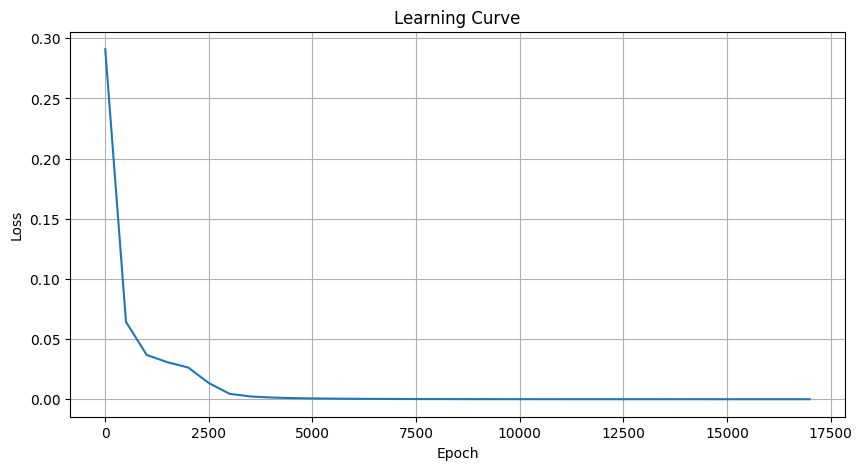

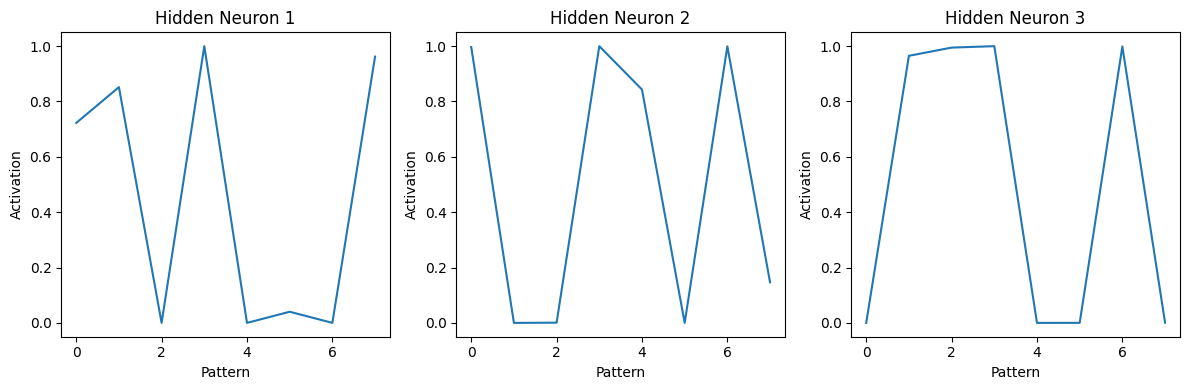


 input patterns:
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]

 output patterns:
[[9.9837637e-01 2.7064299e-11 5.9486229e-14 2.0183222e-03 1.1466515e-03
  1.8712626e-08 6.0560365e-07 9.3057408e-04]
 [5.9939098e-13 9.9824798e-01 1.0244523e-03 2.0447953e-03 1.3164560e-17
  7.2708346e-08 9.7446211e-09 8.5639907e-04]
 [2.5767669e-18 1.4689001e-03 9.9834251e-01 7.3705579e-08 5.5281479e-10
  9.8720391e-04 1.3450237e-03 4.6669202e-10]
 [6.8549596e-04 6.3435244e-04 2.4006344e-10 9.9731928e-01 5.6287489e-13
  8.1336953e-16 8.1182882e-04 7.3710645e-08]
 [1.3611614e-03 4.4403877e-15 2.6849218e-08 5.9126911e-08 9.9820542e-01
  1.0147358e-03 1.4384778e-03 3.6627483e-08]
 [1.7946174e-10 8.9098711e-09 1.2683420e-03 2.1330710e-11 1.3148654e-03
  9.9802506e-01 1.5199364e-08 9.7220344e-04]
 [6.3324462e-10 1.1195674e-10 9.1996870e-04 

In [ ]:
run_experiment(input_size=8, hidden_size=3)


Running experiment with 8-2-8 architecture
Training until convergence...
Epoch 0, Loss: 0.24971029
Epoch 500, Loss: 0.09270392
Epoch 1000, Loss: 0.07088716
Epoch 1500, Loss: 0.05646134
Epoch 2000, Loss: 0.05009817
Epoch 2500, Loss: 0.04205628
Epoch 3000, Loss: 0.03568126
Epoch 3500, Loss: 0.03014043
Epoch 4000, Loss: 0.02468655
Epoch 4500, Loss: 0.02100380
Epoch 5000, Loss: 0.01853452
Epoch 5500, Loss: 0.01680516
Epoch 6000, Loss: 0.01554786
Epoch 6500, Loss: 0.01455875
Epoch 7000, Loss: 0.01320298
Epoch 7500, Loss: 0.00824655
Epoch 8000, Loss: 0.00390435
Epoch 8500, Loss: 0.00259635
Epoch 9000, Loss: 0.00182952
Epoch 9500, Loss: 0.00133118
Epoch 10000, Loss: 0.00099170
Epoch 10500, Loss: 0.00075218
Epoch 11000, Loss: 0.00057716
Epoch 11500, Loss: 0.00044637
Epoch 12000, Loss: 0.00034719
Epoch 12500, Loss: 0.00027119
Epoch 13000, Loss: 0.00021251
Epoch 13500, Loss: 0.00016695
Epoch 14000, Loss: 0.00013143
Epoch 14500, Loss: 0.00010365
Epoch 15000, Loss: 0.00008185
Epoch 15500, Loss: 0

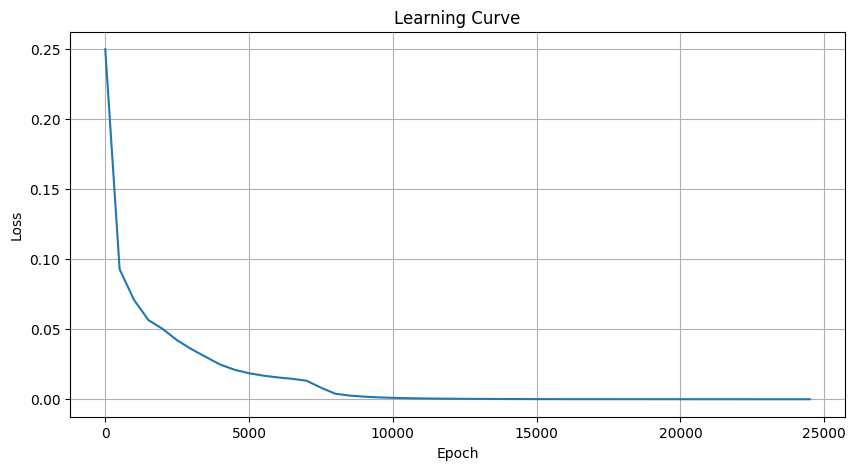

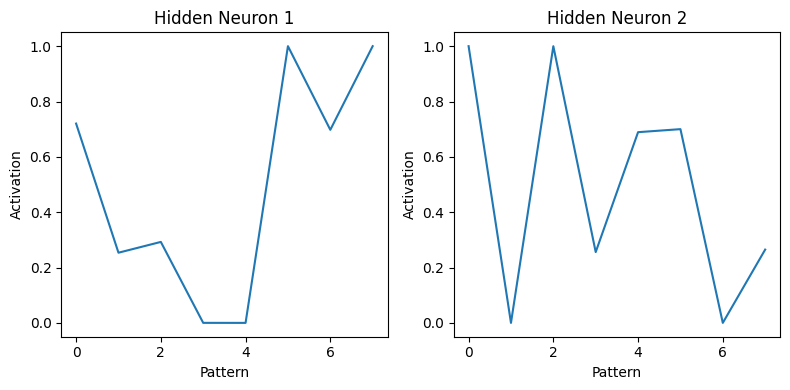


 input patterns:
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]

 output patterns:
[[9.97849345e-01 1.67193320e-38 1.33276300e-03 2.31057447e-33
  3.18652405e-17 1.57859793e-03 4.01145786e-33 5.57040524e-16]
 [4.03261373e-34 9.98188794e-01 1.74861516e-27 1.32830511e-03
  6.21746408e-15 1.91246901e-31 1.28382444e-03 7.08046289e-17]
 [1.63262570e-03 5.01685340e-33 9.97995377e-01 3.64258123e-18
  1.63974962e-03 1.24214263e-17 1.61582661e-38 8.49739430e-29]
 [1.21075331e-29 1.39068300e-03 1.64571699e-16 9.98256028e-01
  1.46047282e-03 1.34598175e-36 7.07846746e-16 7.98942234e-28]
 [1.37080040e-16 1.47607082e-18 1.60471257e-03 1.10887387e-03
  9.97812390e-01 3.62654325e-31 3.20676810e-31 1.68920173e-33]
 [1.57952413e-03 1.00899275e-31 3.09781998e-16 0.00000000e+00
  5.39251996e-30 9.97851610e-01 5.63758536e-19 1.13837363e-

In [ ]:
run_experiment(input_size=8, hidden_size=2)


Running experiment with 50-2-50 architecture
Training until convergence...
Epoch 0, Loss: 0.23260127
Epoch 500, Loss: 0.01991642
Epoch 1000, Loss: 0.01963523
Epoch 1500, Loss: 0.01960156
Epoch 2000, Loss: 0.01959061
Epoch 2500, Loss: 0.01951078
Epoch 3000, Loss: 0.01932270
Epoch 3500, Loss: 0.01911502
Epoch 4000, Loss: 0.01897877
Epoch 4500, Loss: 0.01891835
Epoch 5000, Loss: 0.01886395
Epoch 5500, Loss: 0.01871936
Epoch 6000, Loss: 0.01840508
Epoch 6500, Loss: 0.01779146
Epoch 7000, Loss: 0.01732241
Epoch 7500, Loss: 0.01690921
Epoch 8000, Loss: 0.01656191
Epoch 8500, Loss: 0.01620327
Epoch 9000, Loss: 0.01586351
Epoch 9500, Loss: 0.01557484
Epoch 10000, Loss: 0.01533980
Epoch 10500, Loss: 0.01511815
Epoch 11000, Loss: 0.01485724
Epoch 11500, Loss: 0.01460444
Epoch 12000, Loss: 0.01439169
Epoch 12500, Loss: 0.01420076
Epoch 13000, Loss: 0.01399170
Epoch 13500, Loss: 0.01378173
Epoch 14000, Loss: 0.01360983
Epoch 14500, Loss: 0.01343877
Epoch 15000, Loss: 0.01328820
Epoch 15500, Loss:

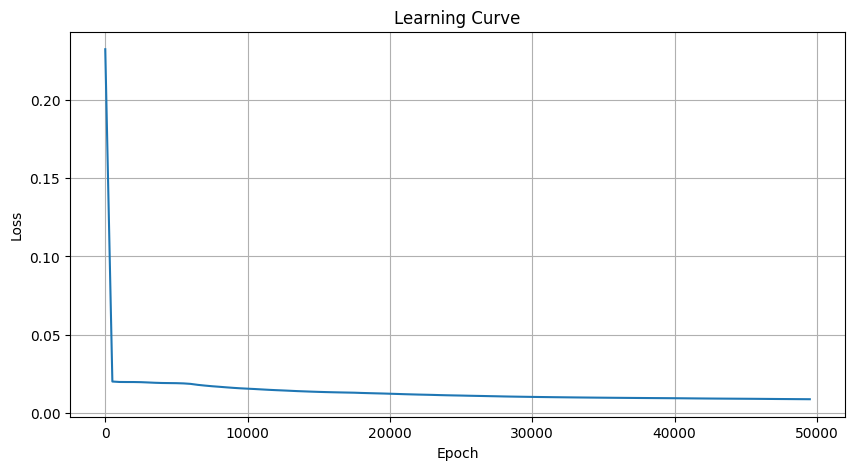

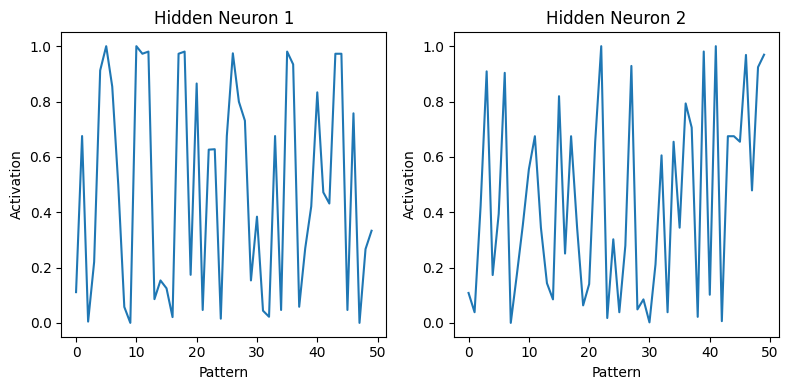


 input patterns:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]

 output patterns:
[[8.2274002e-01 1.6535554e-05 2.3572709e-04 ... 1.3390424e-21
  1.3624589e-09 0.0000000e+00]
 [0.0000000e+00 1.4674643e-01 1.0176150e-19 ... 0.0000000e+00
  2.5381346e-14 0.0000000e+00]
 [4.2546898e-28 2.7791323e-11 2.1634573e-01 ... 1.3045755e-01
  3.2383021e-05 1.1240597e-38]
 ...
 [9.4695236e-35 3.1444081e-12 2.8263661e-01 ... 8.0351651e-01
  1.5242131e-04 1.8994960e-33]
 [0.0000000e+00 3.0816461e-18 4.6967145e-08 ... 5.6050796e-33
  2.1896476e-01 6.5657236e-02]
 [0.0000000e+00 1.2051797e-18 8.2591139e-10 ... 0.0000000e+00
  2.4257343e-01 8.4140259e-01]]

Final MSE: 0.008563
Final MAE: 0.022168


In [ ]:
run_experiment(input_size=50, hidden_size=2)


Running experiment with 64-6-64 architecture
Training until convergence...
Epoch 0, Loss: 0.25235119
Epoch 500, Loss: 0.01542484
Epoch 1000, Loss: 0.01537000
Epoch 1500, Loss: 0.01535061
Epoch 2000, Loss: 0.01524518
Epoch 2500, Loss: 0.01418852
Epoch 3000, Loss: 0.01296029
Epoch 3500, Loss: 0.01174441
Epoch 4000, Loss: 0.01049476
Epoch 4500, Loss: 0.00855474
Epoch 5000, Loss: 0.00637098
Epoch 5500, Loss: 0.00413179
Epoch 6000, Loss: 0.00226338
Epoch 6500, Loss: 0.00133007
Epoch 7000, Loss: 0.00084606
Epoch 7500, Loss: 0.00063211
Epoch 8000, Loss: 0.00051024
Epoch 8500, Loss: 0.00043314
Epoch 9000, Loss: 0.00038145
Epoch 9500, Loss: 0.00034546
Epoch 10000, Loss: 0.00031979
Epoch 10500, Loss: 0.00030111
Epoch 11000, Loss: 0.00028579
Epoch 11500, Loss: 0.00004300
Epoch 12000, Loss: 0.00002923
Epoch 12500, Loss: 0.00002155
Epoch 13000, Loss: 0.00001628
Epoch 13500, Loss: 0.00001244
Epoch 14000, Loss: 0.00000957
Epoch 14500, Loss: 0.00000741
Epoch 15000, Loss: 0.00000576
Epoch 15500, Loss:

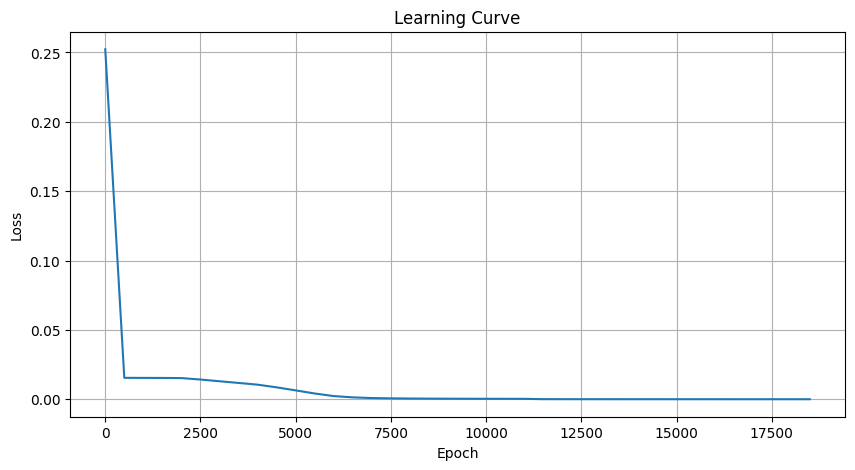

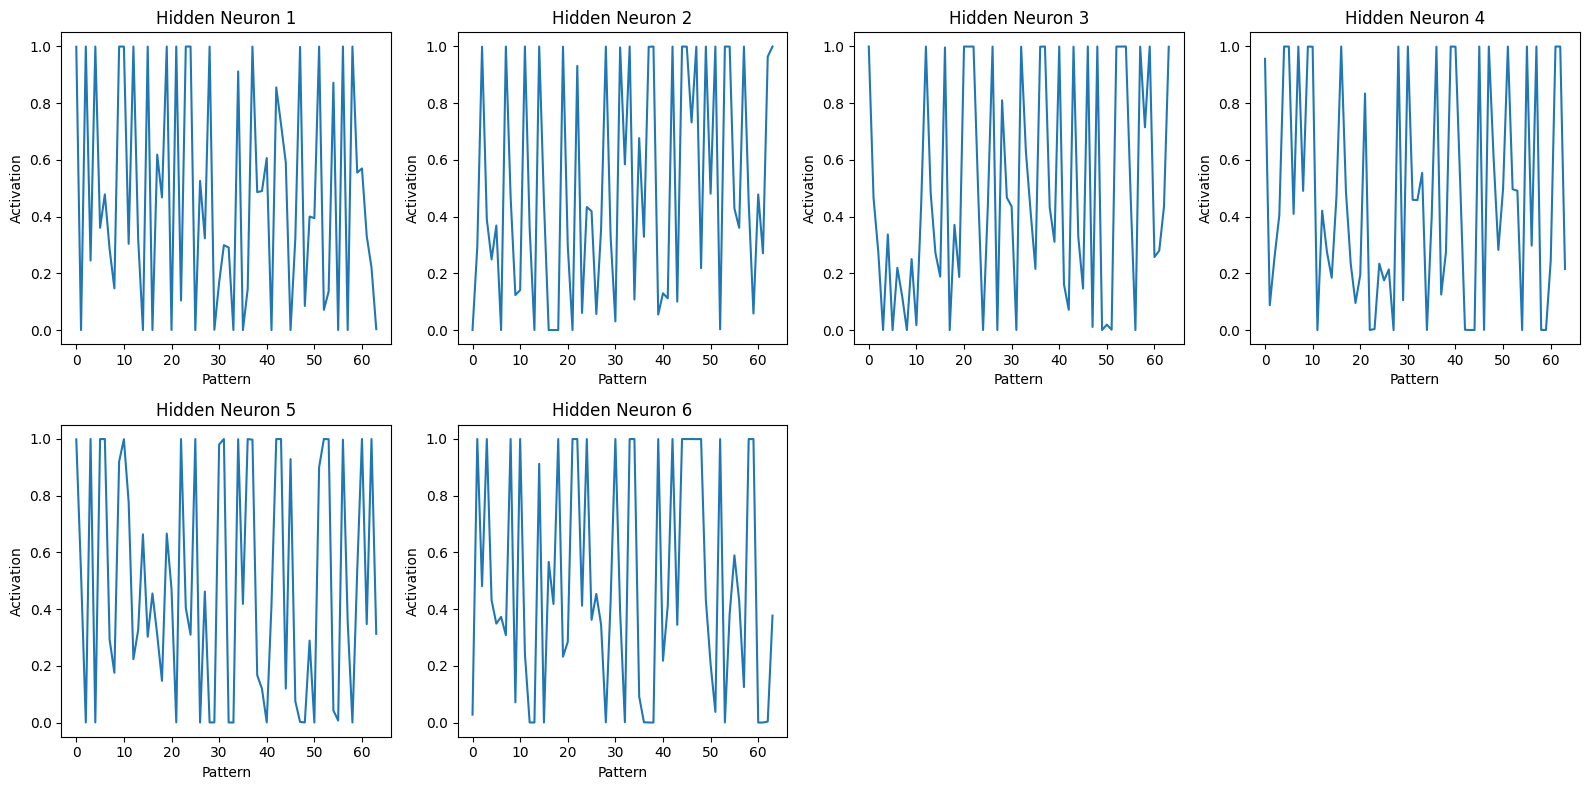


 input patterns:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]

 output patterns:
[[9.94942009e-01 1.75266392e-25 1.45301095e-23 ... 1.91163622e-06
  9.14706678e-13 1.17541954e-22]
 [1.69789126e-14 9.94502664e-01 2.09052297e-17 ... 1.22718080e-15
  4.21074736e-17 5.42857528e-08]
 [1.65151533e-16 1.76898571e-18 9.95356739e-01 ... 4.62892325e-14
  9.93246964e-18 1.95173933e-10]
 ...
 [1.98179237e-06 3.06759475e-18 5.18220076e-14 ... 9.94260192e-01
  2.62344111e-04 2.60790230e-14]
 [1.45207223e-11 3.91692759e-21 1.62487838e-20 ... 4.66500875e-04
  9.95111644e-01 1.94013694e-10]
 [1.33210305e-14 5.79264248e-10 2.32854134e-14 ... 2.78733633e-13
  8.77323283e-11 9.94395971e-01]]

Final MSE: 0.000001
Final MAE: 0.000348


In [ ]:
run_experiment(input_size=64, hidden_size=6)

 # **Result Analysis:**
   - The network has learned to reproduce the identity function very well.
   - Where the input has a 1, the output has a value very close to 1 (>0.999).
   - Where the input has a 0, the output has a value very close to 0 (<0.001).
   - The diagonal elements are all very close to 1 (≈0.999), which is exactly what we want.




### **Transfer (Activation) Functions:**
   - **Hidden Layer:** Logistic Sigmoid (nn.Sigmoid())
     - Range: (0,1)
     - Good choice for binary pattern encoding
     - Helps maintain values in an interpretable range
   - **Output Layer:** Logistic Sigmoid (nn.Sigmoid())
     - Matches our target output range of [0,1]
     - Appropriate for binary pattern reconstruction
     - Ensures outputs are properly bounded

### **Learning Parameters:**
   - **Learning Rate:** 0.01
     - Moderate value that provides stable convergence
     - Not too large to cause overshooting
     - Not too small to cause slow learning
   - **Optimizer:** Adam (optim.Adam)
     - Adaptive learning rate optimization
     - Good for non-stationary objectives

   - **Loss Function:** Mean Squared Error (nn.MSELoss())

     - Penalizes larger errors more heavily
     - Good for binary pattern reconstruction
   
   - **Batch Size:** Full batch (all patterns at once)
     - Given small dataset size, full batch training is efficient
     - Provides stable gradient updates

